In [ ]:
import os
import sys

In [ ]:
REPO_ROOT = "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio"
sys.path.append(REPO_ROOT)

In [ ]:
from config import config
from optimisation.wandb_opt import WandbOptimisation
from pbenchmark.portfolio_benchmark import PortfolioBenchmark
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser
from visualiser.model_visualiser import ModelVisualiser

wandb: Currently logged in as: ingridpi (xdl-team) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
USE_CASE = "portfolio-optimisation"

In [ ]:
data_dir = f"{REPO_ROOT}/{config.DATA_DIR}/{config.DATASET_NAME}"
plot_dir = (
    f"{REPO_ROOT}/{config.PLOT_DIR}/{config.TICKERS_NAME}/{config.DATASET_NAME}"
)
models_dir = f"{REPO_ROOT}/{config.MODELS_DIR}/{USE_CASE}/{config.TICKERS_NAME}/{config.DATASET_NAME}"
results_dir = (
    f"{REPO_ROOT}/{config.RESULTS_DIR}/{USE_CASE}/{config.DATASET_NAME}"
)
logs_dir = f"{REPO_ROOT}/{config.LOGS_DIR}/{USE_CASE}/{config.TICKERS_NAME}/{config.DATASET_NAME}"

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [ ]:
finpreprocessor = FinancialDataPreprocessor(
    start_date=config.START_DATE,
    end_date=config.END_DATE,
)
train_val_data, trade_data = finpreprocessor.load_train_test_data(
    directory=data_dir,
    filename=config.TICKERS_NAME,
)

In [ ]:
# Split the training data into training and validation sets
train_data, val_data = finpreprocessor.split_train_test(
    data=train_val_data,
    test_start_date=config.VAL_START_DATE,
)

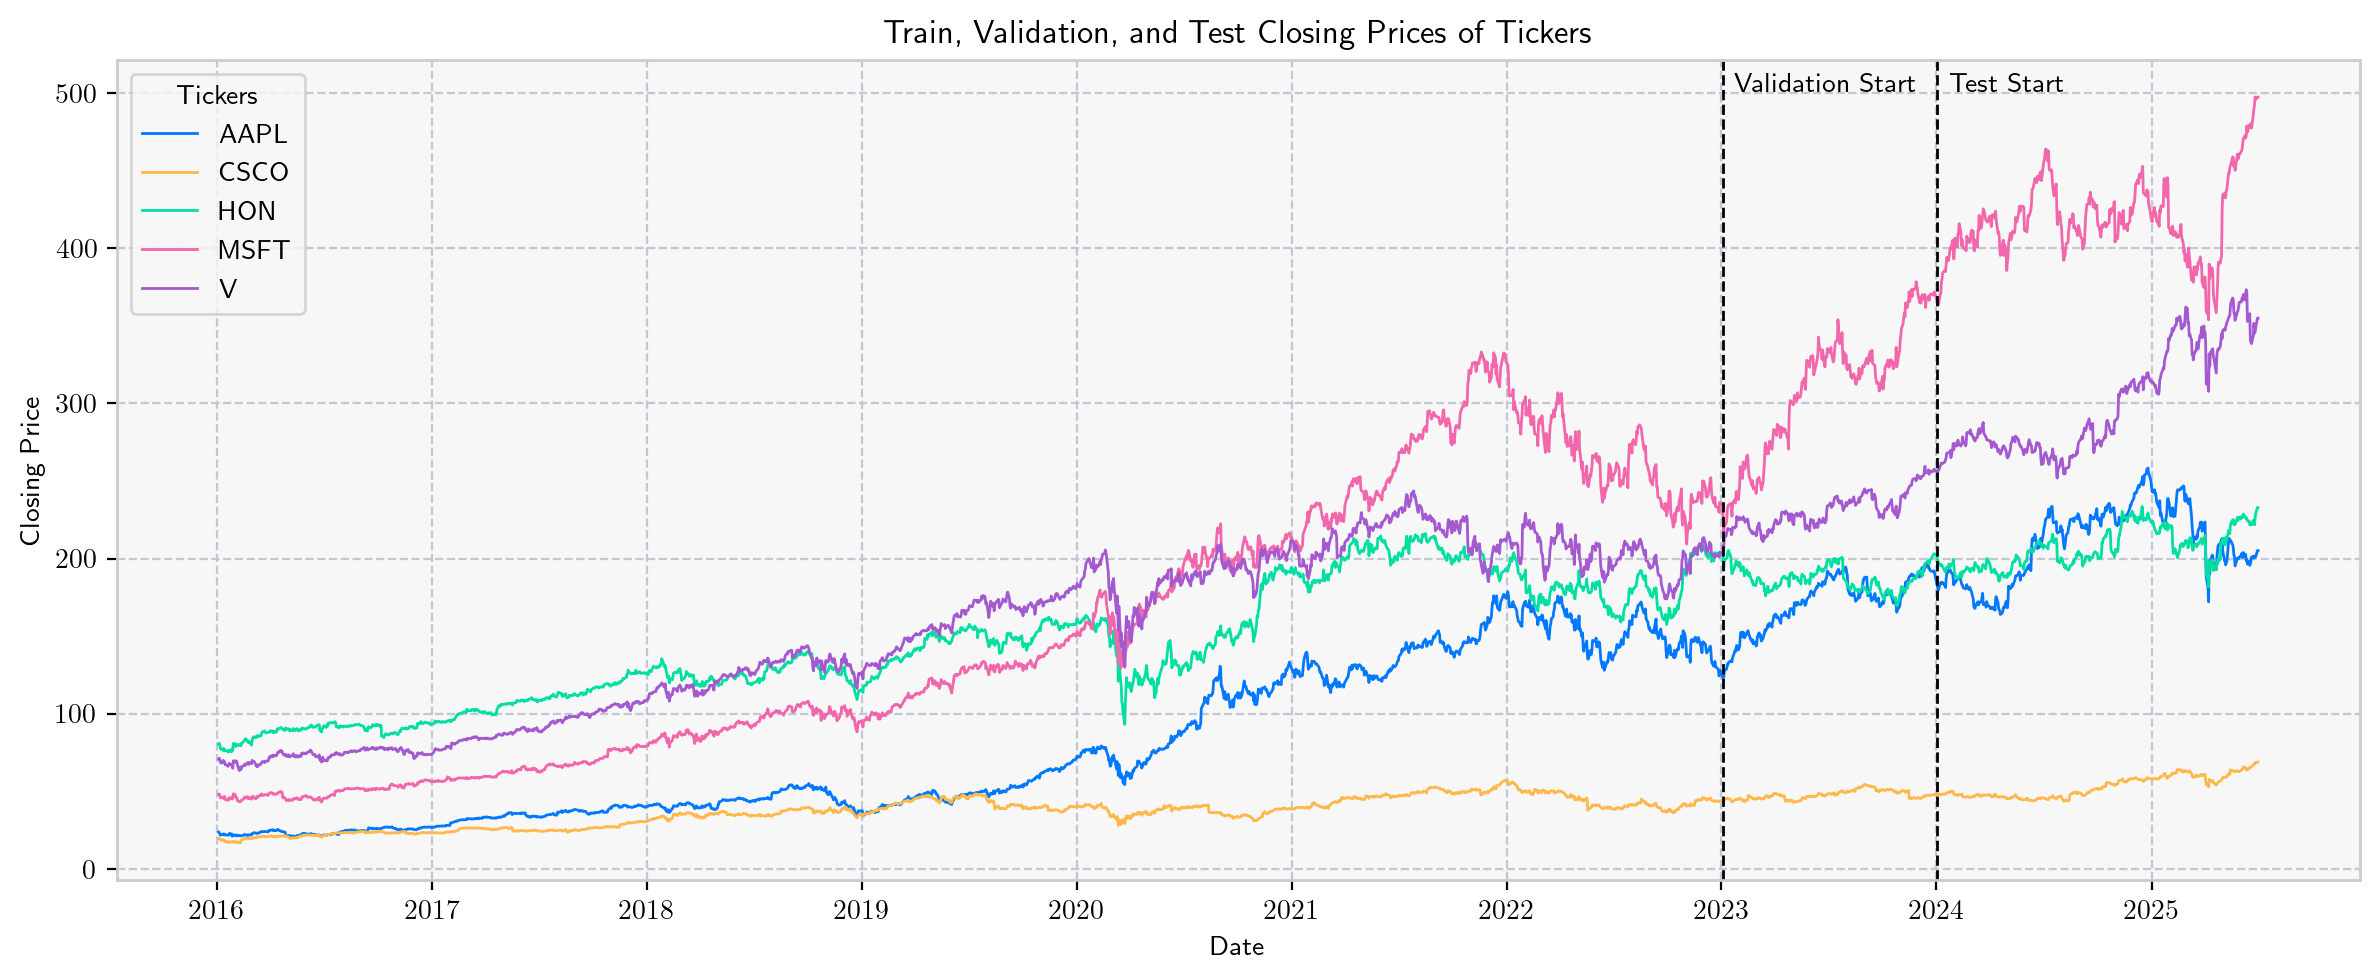

In [ ]:
visualiser = FinancialDataVisualiser(directory=plot_dir)
visualiser.plot_train_val_test_close_prices(
    train_data=train_data,
    val_data=val_data,
    test_data=trade_data,
)

In [ ]:
wandb_opt = WandbOptimisation(
    entity=config.WANDB_ENTITY,
    project=config.WANDB_PROJECT,
    train_data=train_data,
    val_data=val_data,
    test_data=trade_data,
    state_columns=config.ENVIRONMENT_COLUMNS,
)

In [ ]:
model_visualiser = ModelVisualiser(directory=plot_dir)
benchmark = PortfolioBenchmark()

In [ ]:
sweep_ids = {}
best_runs = {}
perf_stats = {}

In [ ]:
def perform_model_sweep(model_name: str):
    sweep_id = wandb_opt.sweep(
        config.SWEEP_CONFIG, model_name=model_name, number_trials=20
    )
    sweep_ids[model_name] = sweep_id

    run_id, configuration = wandb_opt.get_best_sweep(
        sweep_id=sweep_id, model_name=model_name
    )

    best_runs[model_name] = (run_id, configuration)

    df_account, df_actions = wandb_opt.test_best_run(
        model_name=model_name,
        configuration=configuration,
        train_val_data=train_val_data,
        logs_directory=logs_dir,
        models_directory=models_dir,
    )

    model_visualiser.evaluate_testing(
        model_name=model_name,
        account_data=df_account,
        actions_data=df_actions,
    )

    perf_stats_alg = benchmark.compute_perf_stats(df_account=df_account)
    perf_stats[model_name] = perf_stats_alg

## A2C


Create sweep with ID: ox0rqni3
Sweep URL: https://wandb.ai/xdl-team/xdl-portfolio/sweeps/ox0rqni3


wandb: Agent Starting Run: 2jevmfdl with config:
wandb: 	ent_coef: 0.0004078264399012749
wandb: 	learning_rate: 0.005479768021699295
wandb: 	n_steps: 10


wandb: Agent Starting Run: sgb9eixj with config:
wandb: 	ent_coef: 0.00018963339428395992
wandb: 	learning_rate: 0.00046062336967331454
wandb: 	n_steps: 30


wandb: Agent Starting Run: okp56est with config:
wandb: 	ent_coef: 0.0008022628197543823
wandb: 	learning_rate: 0.007633409811926704
wandb: 	n_steps: 40


wandb: Agent Starting Run: 0iyym2kz with config:
wandb: 	ent_coef: 0.0005777622244012319
wandb: 	learning_rate: 0.0006240691537857377
wandb: 	n_steps: 30


wandb: Agent Starting Run: uk9ielgg with config:
wandb: 	ent_coef: 2.439249307015205e-05
wandb: 	learning_rate: 0.0015525695244790311
wandb: 	n_steps: 20


wandb: Agent Starting Run: gf6goa3c with config:
wandb: 	ent_coef: 0.0009779500432385132
wandb: 	learning_rate: 0.003448565160332307
wandb: 	n_steps: 5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c010qe5v with config:
wandb: 	ent_coef: 0.0001093719705056609
wandb: 	learning_rate: 0.007876538445035367
wandb: 	n_steps: 20


wandb: Agent Starting Run: 5ge2dan3 with config:
wandb: 	ent_coef: 0.000376787575790944
wandb: 	learning_rate: 0.007846140902693598
wandb: 	n_steps: 20


wandb: Agent Starting Run: vfjn8x56 with config:
wandb: 	ent_coef: 0.00038239358300752943
wandb: 	learning_rate: 0.002631244013535495
wandb: 	n_steps: 30


wandb: Agent Starting Run: xu11daah with config:
wandb: 	ent_coef: 0.00044093271153222897
wandb: 	learning_rate: 0.0028055155094598265
wandb: 	n_steps: 30


wandb: Agent Starting Run: vvu3vdbp with config:
wandb: 	ent_coef: 0.0004896522974564386
wandb: 	learning_rate: 0.002925953290680318
wandb: 	n_steps: 20


wandb: Agent Starting Run: rua75c80 with config:
wandb: 	ent_coef: 0.0005034183321912225
wandb: 	learning_rate: 0.000560639470839195
wandb: 	n_steps: 10


wandb: Agent Starting Run: 42svtoq5 with config:
wandb: 	ent_coef: 0.0009929203090382251
wandb: 	learning_rate: 0.002181802523703927
wandb: 	n_steps: 5


wandb: Agent Starting Run: o92cq66u with config:
wandb: 	ent_coef: 0.0003833284546139188
wandb: 	learning_rate: 0.004075010342487967
wandb: 	n_steps: 10


wandb: Agent Starting Run: o4y31tru with config:
wandb: 	ent_coef: 0.00035654546503114634
wandb: 	learning_rate: 0.0033295162159402165
wandb: 	n_steps: 40


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5hd19fta with config:
wandb: 	ent_coef: 0.0007178125552956746
wandb: 	learning_rate: 0.008666415401405964
wandb: 	n_steps: 20


wandb: Agent Starting Run: 7a4a6dxg with config:
wandb: 	ent_coef: 0.0008253329258319552
wandb: 	learning_rate: 0.006114112091478021
wandb: 	n_steps: 20


wandb: Agent Starting Run: uqbh8roy with config:
wandb: 	ent_coef: 0.0005881708563501437
wandb: 	learning_rate: 0.0050235914927489085
wandb: 	n_steps: 20


wandb: Agent Starting Run: cbhlo0lo with config:
wandb: 	ent_coef: 0.0009894242567334175
wandb: 	learning_rate: 0.00025975415406286664
wandb: 	n_steps: 5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 06qy7hqi with config:
wandb: 	ent_coef: 0.00026550940923340566
wandb: 	learning_rate: 0.005370384181873416
wandb: 	n_steps: 5


Best run configuration:
	n_steps: 40
	ent_coef: 0.000357
	learning_rate: 0.003330
Best run metrics:
	sharpe_ratio: 2.1668
	cumulative_return: 0.3359
Environment successfully created with 
	Stock dimension: 5 
	State space: 4
Model arguments: {'n_steps': 40, 'ent_coef': 0.00035654546503114634, 'learning_rate': 0.0033295162159402165}
Using cpu device
Training model: A2C
day: 2011, episode: 10
begin_total_asset:100000.00
end_total_asset:445271.97
sharpe_ratio: 0.95
day: 2011, episode: 20
begin_total_asset:100000.00
end_total_asset:454150.98
sharpe_ratio: 0.97
day: 2011, episode: 30
begin_total_asset:100000.00
end_total_asset:547014.01
sharpe_ratio: 1.05
day: 2011, episode: 40
begin_total_asset:100000.00
end_total_asset:547014.01
sharpe_ratio: 1.05
day: 2011, episode: 50
begin_total_asset:100000.00
end_total_asset:547014.01
sharpe_ratio: 1.05
Saving model: A2C
Model saved to /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/models/portfolio-optimisation/test/simple-dataset/a2

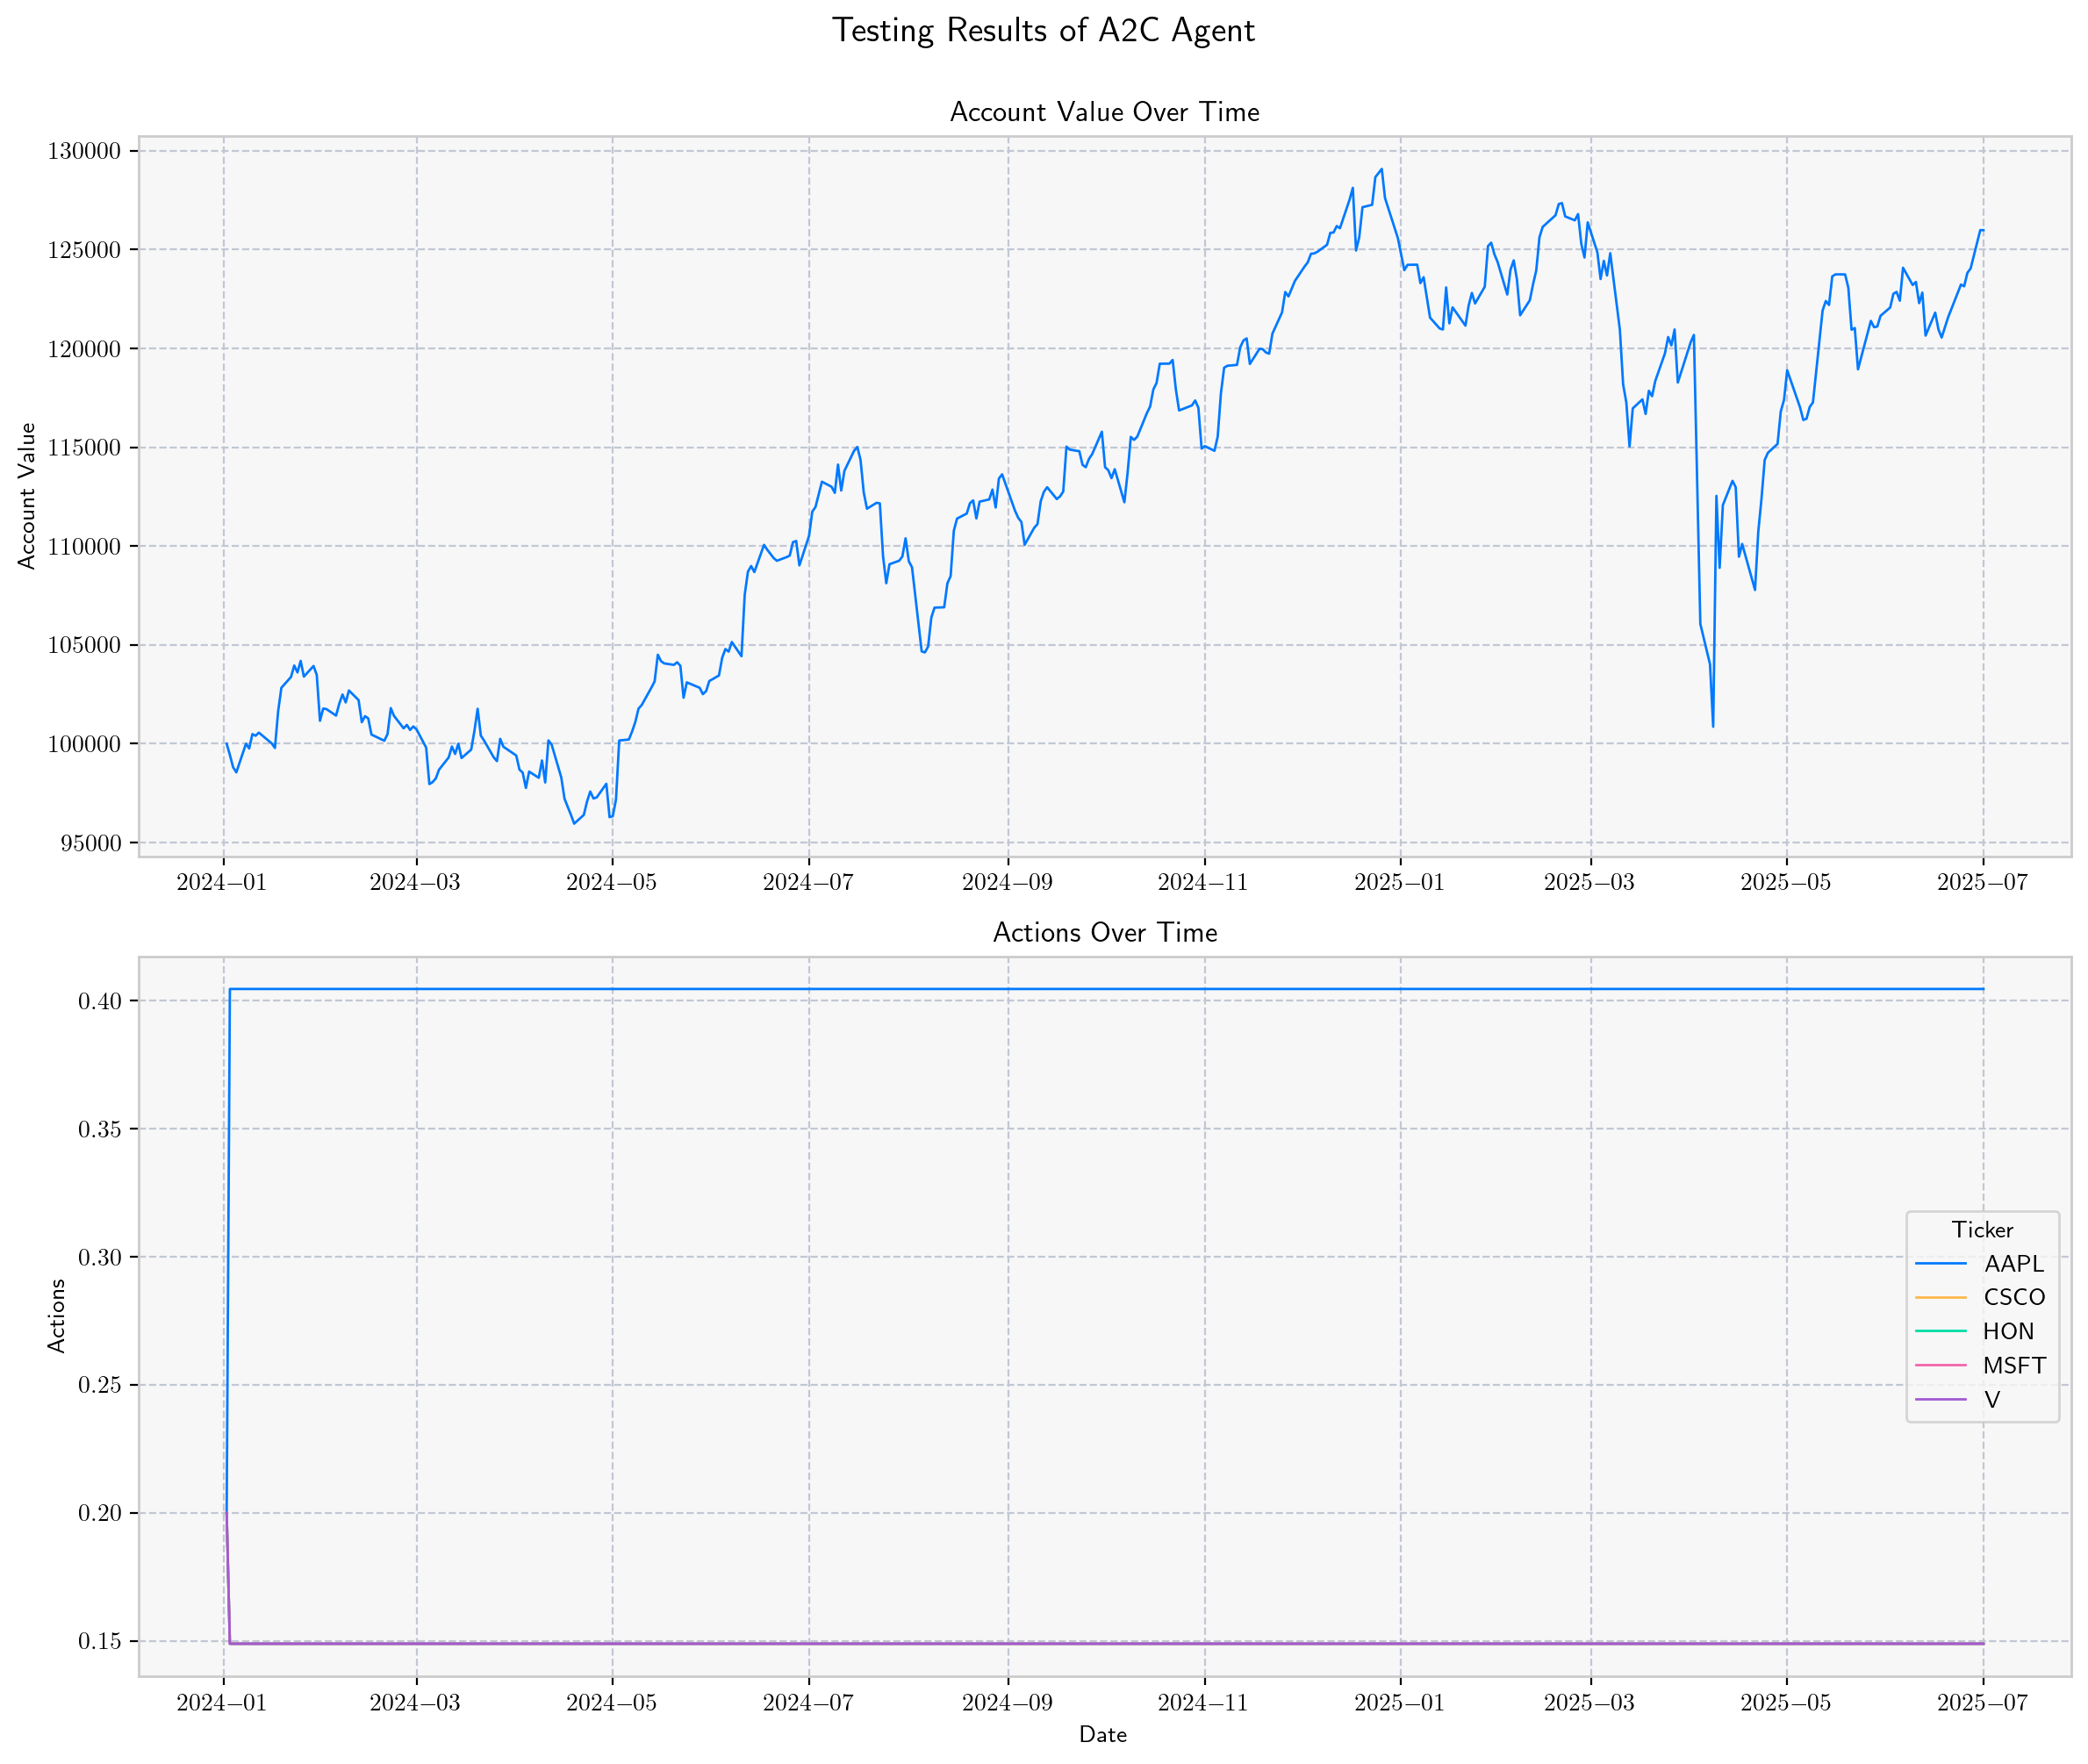

In [ ]:
model_name = "a2c"
perform_model_sweep(model_name)